In [56]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import os, sys
path = os.getcwd()
while not path.endswith('research'):    
    path = os.path.abspath(os.path.join(path, '../'))
sys.path.append(path)

***

In [58]:
#a number of gas analytics utilities:
from gmt.fom.gas.shared.utils.common import print_attributes as pa
from gmt.fom.gas.shared.utils.common import display_full_df as ddff
from gmt.fom.gas.shared.utils.common import flatten_lst

In [59]:
#gas aligned mongo db
from gmt.fom.gas.shared.utils.mongo import GasMongo

In [60]:
import logging
logging.getLogger().setLevel(logging.INFO)

***

In [61]:
import os, sys
import numpy as np

from datetime import datetime, date

In [62]:
import pandas as pd

In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [64]:
import statsmodels.api as sm

# Time Series Modelling

In statistics and quantitative research methodology, a *sample* is a set of individuals or objects collected or selected from a statistical population by a defined procedure

In mathematical terms, given a probability distribution F, a random sample of length n (where n may be any positive integer) is a set of realizations of n *independent, identically distributed (iid) random variables with distribution F*.

In cross-sectional data analysis, it is commonly assumed that observations in a sample are effectively i.i.d.

What about in time-series analysis?

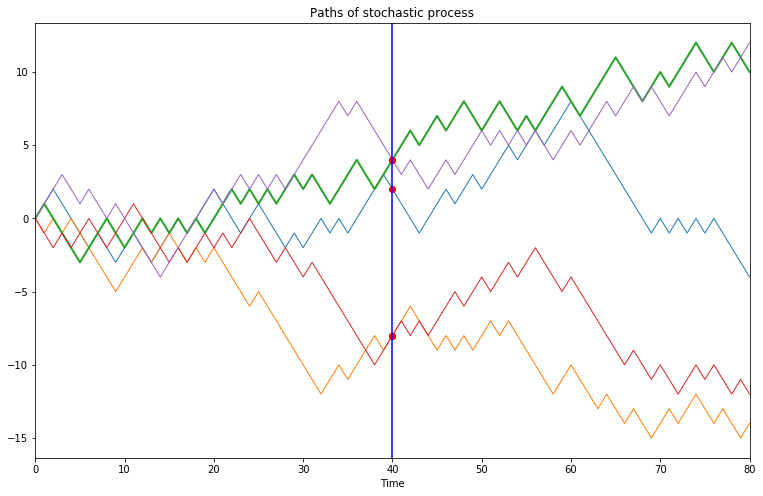

In [65]:
N=5
paths = []
for i in range(N):
    dims = 1
    step_n = 80
    step_set = [-1, 1]
    origin = np.zeros((1,dims))
    # Simulate steps in 1D
    step_shape = (step_n,dims)
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    start = path[:1]
    stop = path[-1:]
    paths.append(path)

# Plot the path
fig = plt.figure(figsize=(8*1.6,8))
ax = fig.add_subplot(111)

k = int(step_n/2)
for i in range(len(paths)):
    if i == 2:
        ax.plot(paths[i],lw=2)
    else:
        ax.plot(paths[i],lw=1)
    ax.set_xlim(0, step_n)
    ax.plot(k, paths[i][k], c='red', marker='o')
    
ax.set_xlabel('Time')
ax.set_title('Paths of stochastic process')
plt.axvline(k, color='b')
plt.show()

# Folders

In [66]:
folder_data = os.path.join(os.getcwd(), 'data'); folder_data

'C:\\git\\gmt-fom-gas-research\\sandbox\\alexs\\python_workshop\\modelling_in_python\\data'

In [67]:
folder_results = os.path.join(os.getcwd(), 'results'); folder_results

'C:\\git\\gmt-fom-gas-research\\sandbox\\alexs\\python_workshop\\modelling_in_python\\results'

# Data

In [68]:
df_google = pd.read_csv(os.path.join(folder_data, 'google.csv')); df_google.head()

day ticker   name  ccy   indx         open         high  \
0  2021-01-05  GOOGL  GOOGL  USD  SP500  1725.089966  1746.829956   
1  2021-01-04  GOOGL  GOOGL  USD  SP500  1760.000000  1762.489990   
2  2020-12-31  GOOGL  GOOGL  USD  SP500  1737.270020  1757.500000   
3  2020-12-30  GOOGL  GOOGL  USD  SP500  1765.000000  1767.760010   
4  2020-12-29  GOOGL  GOOGL  USD  SP500  1787.229980  1788.469971   

           low        close     volume   closeunadj  
0  1716.900024  1740.050049  1015942.0  1740.050049  
1  1707.140015  1726.130005  1866195.0  1726.130005  
2  1736.089966  1752.640015  1053479.0  1752.640015  
3  1728.000000  1736.250000  1051308.0  1736.250000  
4  1755.109985  1757.760010   982077.0  1757.760010

In [69]:
df_sp500 = pd.read_csv(os.path.join(folder_data, 'sp500_index.csv')); df_sp500.head()

day      ticker        name  ccy   indx         open  high  low  \
0  2020-10-12  SP500Index  SP500Index  USD  SP500  3534.219971   NaN  NaN   
1  2020-10-09  SP500Index  SP500Index  USD  SP500  3477.129883   NaN  NaN   
2  2020-10-08  SP500Index  SP500Index  USD  SP500  3446.830078   NaN  NaN   
3  2020-10-07  SP500Index  SP500Index  USD  SP500  3419.449951   NaN  NaN   
4  2020-10-06  SP500Index  SP500Index  USD  SP500  3360.949951   NaN  NaN   

         close  volume  closeunadj  
0  3534.219971     NaN         NaN  
1  3477.129883     NaN         NaN  
2  3446.830078     NaN         NaN  
3  3419.449951     NaN         NaN  
4  3360.949951     NaN         NaN

# Exploratory Analysis

In [70]:
# we see that day is 'object' - we need to convert to datetime
df_google.dtypes.to_frame();

**`pd.to_datetime()`**

In [71]:
df_google['day'] = pd.to_datetime(df_google['day'])

df_google.head(1)

day ticker   name  ccy   indx         open         high          low  \
0 2021-01-05  GOOGL  GOOGL  USD  SP500  1725.089966  1746.829956  1716.900024   

         close     volume   closeunadj  
0  1740.050049  1015942.0  1740.050049

In [72]:
df_sp500['day'] = pd.to_datetime(df_sp500['day'])

df_sp500.head(1)

day      ticker        name  ccy   indx         open  high  low  \
0 2020-10-12  SP500Index  SP500Index  USD  SP500  3534.219971   NaN  NaN   

         close  volume  closeunadj  
0  3534.219971     NaN         NaN

**`describe()`**

In [73]:
import pandas as pd

In [74]:
pd.__version__

'0.25.3'

In [75]:
df_google.describe()

open         high          low        close        volume  \
count  4124.000000  4124.000000  4124.000000  4124.000000  4.124000e+03   
mean    556.304815   561.601993   550.720136   556.303282  6.803173e+06   
std     410.287988   414.318338   406.384995   410.539693  7.851909e+06   
min      49.645000    50.921001    48.028000    50.055000  4.655330e+05   
25%     242.207005   245.137501   239.990005   242.504005  1.806072e+06   
50%     353.123001   356.751999   349.101501   351.744492  4.106900e+06   
75%     809.837509   813.922485   805.102478   809.855026  8.623650e+06   
max    1820.540039  1843.829956  1817.000000  1824.969971  8.215110e+07   

        closeunadj  
count  4124.000000  
mean    712.446072  
std     339.020082  
min     100.110001  
25%     485.008011  
50%     603.783997  
75%     930.940002  
max    1824.969971

**let's set day column to be index of the dataFrame**

In [76]:
df_google.set_index('day', inplace=True)
df_sp500.set_index('day', inplace=True)

**plots**

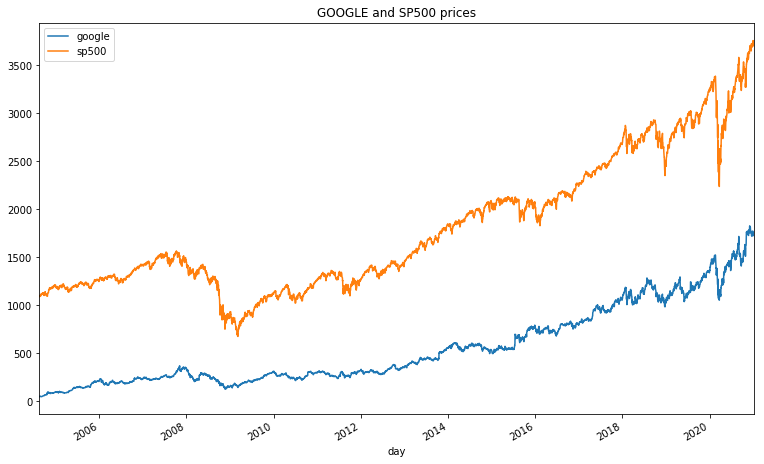

In [77]:
fig, ax = plt.subplots()
df_google['close'].plot(figsize=(8*1.6,8), ax=ax, label='google')

# df_sp500['close'].plot(figsize=(8*1.6,8), ax=ax, label='sp500')

##----------------------- ALIGN TIME SERIES -------------------------- ##
idx = df_google.index
df_sp500.loc[idx]['close'].plot(figsize=(8*1.6,8), ax=ax, label='sp500')
#-----------------------------------------------------------------------#

ax.set_title('GOOGLE and SP500 prices')
ax.legend()
plt.show()

# Data preprocessing and stationarity

Trends can result in a varying mean over time, whereas seasonality can result in a changing variance over time, both which define a time series as being non-stationary.

trend:  
- retression on time
- subtract trend --> work with residuals $\hat{y}_t = x_t - \hat{\mu_t}$, where $\mu_t$ - trend
- include lagged variables



seasonlaty:
* time dummy variables
* difference
    

transformations:
* $y_t = \log x_t$ : tends to supress larger fluctuations that occur over portions of the series where the underlying values are larger
* Box-Cox family:
$$
 y_t = \begin{cases} 
     (x_t^\lambda -1) / \lambda, & \text{$\lambda \neq 0$} \\
     \log x_t, & \text{$\lambda =0$ } 
 \end{cases}
$$
* domain based

In [78]:
google_close = df_google['close']

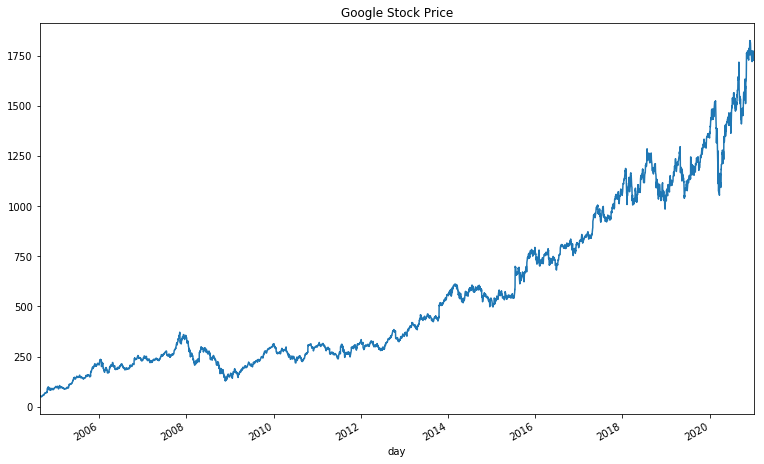

In [79]:
df_google['close'].plot(figsize=(8*1.6,8), title='Google Stock Price')

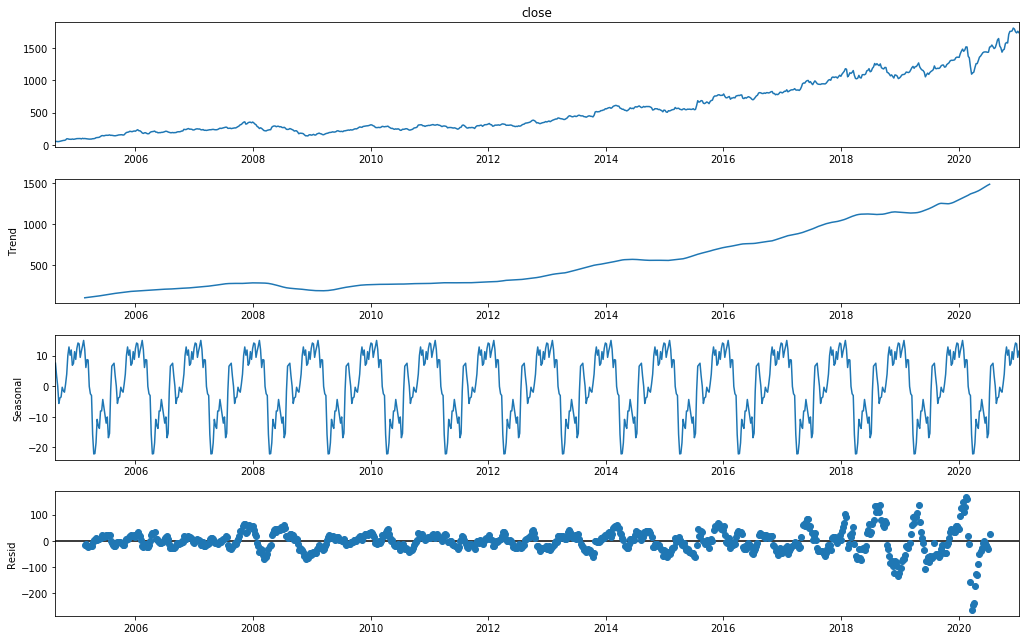

In [81]:
decompose_result = sm.tsa.seasonal_decompose(google_close.resample('1W').mean().dropna())
with mpl.rc_context():
    mpl.rc("figure", figsize=(9*1.6,9))
    trend = decompose_result.trend
    seasonal = decompose_result.seasonal
    residual = decompose_result.resid
    decompose_result.plot();

**The time series is clearly non-stationary, so we need to transform to obtain (weak) stationarity**

In [82]:
google_rt = np.log(google_close.sort_index(ascending=True).divide(google_close.sort_index(ascending=True).shift(1))).sort_index(ascending=False)
google_rt = google_rt[~google_rt.isnull()]

In [83]:
pd.DataFrame(pd.concat([google_close, google_rt], axis=1).reset_index().values, columns=['day', 'close', 'r_t']).set_index('day').sort_index(ascending=False).head()

close         r_t
day                            
2021-01-05  1740.05  0.00803197
2021-01-04  1726.13  -0.0152413
2020-12-31  1752.64  0.00939562
2020-12-30  1736.25  -0.0123127
2020-12-29  1757.76 -0.00917404

In [84]:
np.log(1740.05/1726.13)

0.008031939964980766

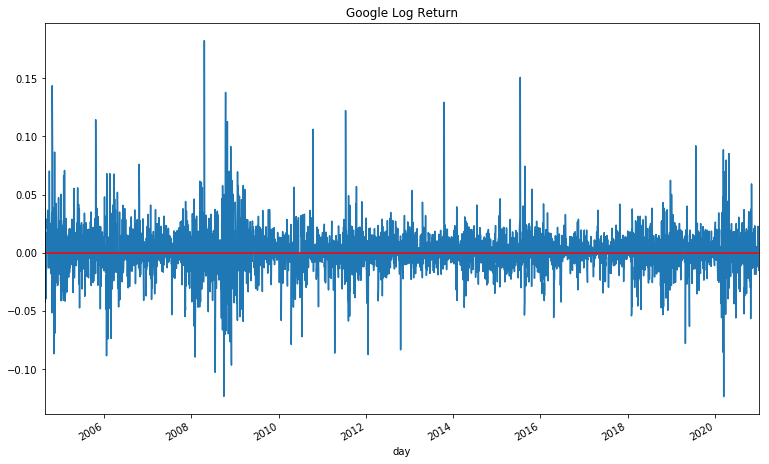

In [85]:
fig, ax = plt.subplots()
google_rt.plot(figsize=(8*1.6,8), title='Google Log Return', ax=ax)
x_vals = ax.get_xticks()
plt.axhline(0.0, color='r')
plt.show()

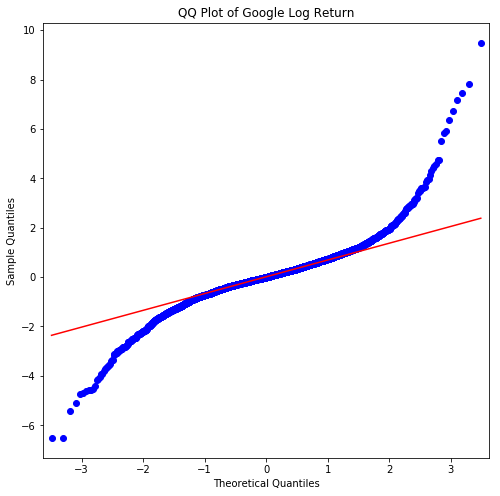

In [86]:
fig, ax = plt.subplots(figsize=(8,8))
sm.graphics.qqplot(google_rt, line='q', fit=True, ax=ax)
ax.set_title('QQ Plot of Google Log Return')
plt.show()

**Sample Autocorrelation | Partial autocorrelation functions**

**ACF** is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence. 

In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.

**PACF** is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. 

So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.

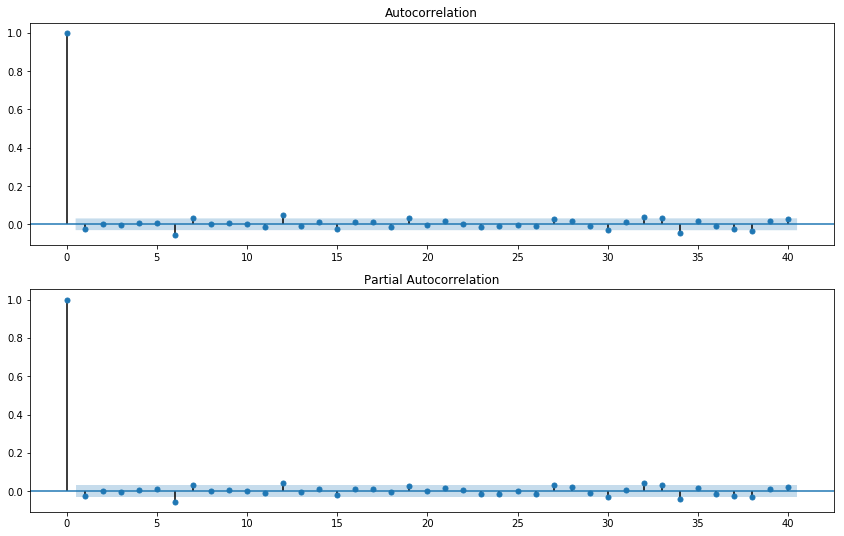

In [89]:
fig = plt.figure(figsize=(9*1.6,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(google_rt, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(google_rt, lags=40, ax=ax2)

**Augmented Dickey-Fuller test**: $H_0$: a unit root is present in a time series sample $\Rightarrow$ non-stationary.

In [87]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [88]:
adf_test(google_rt)

Results of Dickey-Fuller Test:
Test Statistic                  -24.440169
p-value                           0.000000
#Lags Used                        6.000000
Number of Observations Used    4116.000000
Critical Value (1%)              -3.431940
Critical Value (5%)              -2.862242
Critical Value (10%)             -2.567144
dtype: float64


# Training | (Validation) |  Testing splits

https://towardsdatascience.com/time-based-cross-validation-d259b13d42b8

In [90]:
from sklearn.model_selection import TimeSeriesSplit

In [91]:
import sklearn as sk

In [92]:
sk.__version__

'0.22.1'

In [93]:
TimeSeriesSplit()

TimeSeriesSplit(max_train_size=None, n_splits=5)

In [94]:
tscv = TimeSeriesSplit(n_splits=9)

In [95]:
X = google_rt.sort_index(ascending=True)
X = X[-300:]

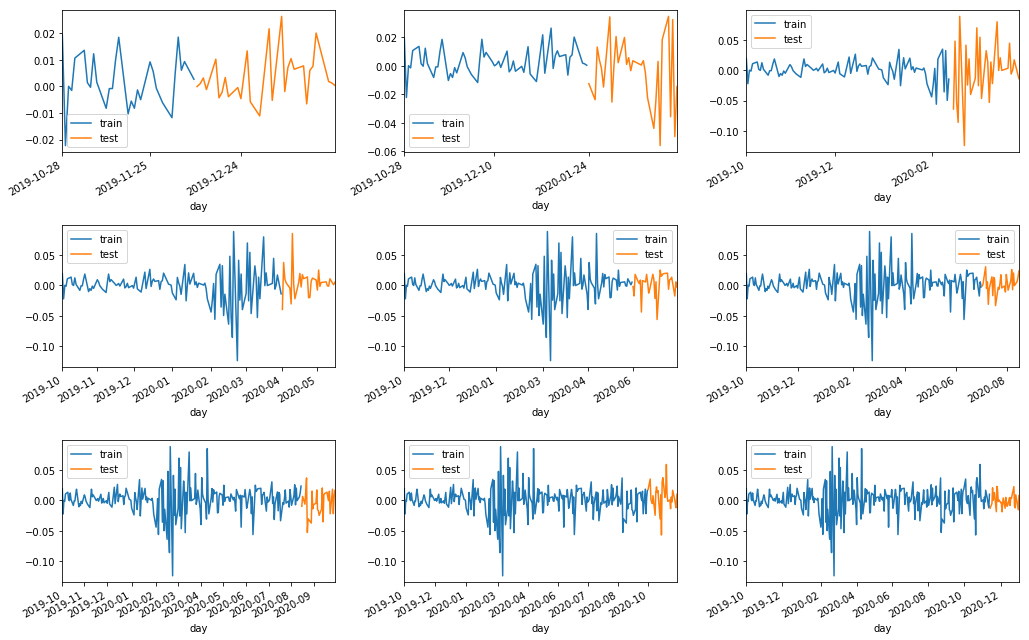

In [96]:
fig, axs = plt.subplots(3,3, figsize=(9*1.6,9))
i=j=0
res=[]
for train_index, test_index in tscv.split(X):      
    X_train, X_test = X[train_index], X[test_index]
    X_train.plot(ax=axs[i,j], label='train')
    X_test.plot(ax=axs[i,j], label='test')
    res.append((X_train,X_test))
    idx  = pd.concat([X_train, X_test], axis=0).index
    axs[i,j].set_xticks(idx[0::(j+2)*10])
    axs[i,j].legend()        
    j+=1
    if j%3==0:
        i+=1
        j=0
plt.tight_layout()
plt.show()

In [97]:
[len(train_index) for train_index, test_index in tscv.split(X)]

[30, 60, 90, 120, 150, 180, 210, 240, 270]

In [98]:
[len(test_index) for train_index, test_index in tscv.split(X)]

[30, 30, 30, 30, 30, 30, 30, 30, 30]

In [99]:
res[0][0].shape

(30,)

In [100]:
res[0][1].shape

(30,)

In [101]:
res[3][0].shape

(120,)

# Modelling

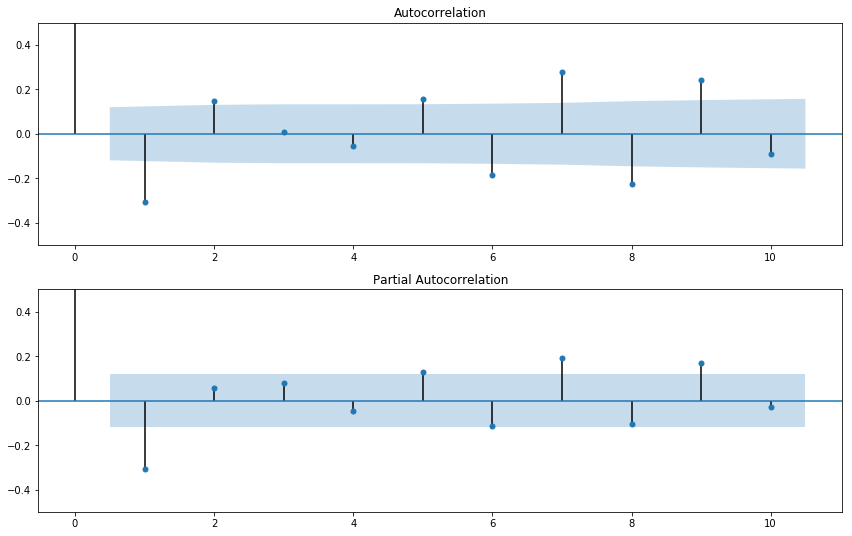

In [102]:
fig = plt.figure(figsize=(9*1.6,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(X_train, lags=10, ax=ax1)
ax1.set_ylim(-0.5,0.5)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(X_train, lags=10, ax=ax2, method='ols')
ax2.set_ylim(-0.5,0.5)
plt.show()

In [103]:
adf_test(X_train)

Results of Dickey-Fuller Test:
Test Statistic                  -4.249115
p-value                          0.000544
#Lags Used                       8.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64


## AR(I)MA

**AR(p)** 
$$
y_t = c + \phi_1y_{t-1} + \phi_2y_{t-2}+\ldots+\phi_py_{t-p}+\varepsilon_t
$$

Here $\varepsilon_t$ is white noise (a collection of uncorrelated random variables, with mean $0$ and finite variance $\sigma^2$)

Order **p** is the lag value after which *PACF* plot crosses the upper confidence interval for the first time. 

These p lags will act as our features while forecasting the AR time series. We cannot use the ACF plot here because it will show good correlations even for the lags which are far in the past. If we consider those many features, we will have multicollinearity issues.This is not a problem with PACF plot as it removes components already explained by earlier lags, so we only get the lags which have the correlation with the residual i.e the component not explained by earlier lags.

**MA(q)**
$$
y_t = c + \varepsilon_t + \theta_1\varepsilon_{t-1}+\theta_2\varepsilon_{t-2}+\ldots+\theta_q\varepsilon_{t-q}
$$

Here $\varepsilon_t$ is white noise (a collection of uncorrelated random variables, with mean $0$ and finite variance $\sigma^2$)

Order **q** of the MA process is obtained from the *ACF* plot, this is the lag after which ACF crosses the upper confidence interval for the first time. 

As we know PACF captures correlations of residuals and the time series lags, we might get good correlations for nearest lags as well as for past lags. Why would that be? Since our series is linear combination of the residuals and none of time series own lag can directly explain its present (since its not an AR), which is the essence of PACF plot as it subtracts variations already explained by earlier lags, its kind of PACF losing its power here! On the other hand being a MA process, it doesn’t have the seasonal or trend components so the ACF plot will capture the correlations due residual components only. You can also think of it as ACF which is a complete plot (capturing trend, seasonality, cyclic and residual correlations) acting as a partial plot since we don’t have trends, seasons, etc.

**Ljung–Box** test $H_0$: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process)

**Jarque–Bera** test $H_0$: is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A joint $H_0$ of the skewness being zero and the excess kurtosis being zero.

C:\Users\ashubert\Anaconda3\envs\time_series_modelling\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  270
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 646.555
Date:                Mon, 08 Feb 2021   AIC                          -1283.111
Time:                        10:55:26   BIC                          -1265.175
Sample:                             0   HQIC                         -1275.906
                                - 270                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7367      0.062    -28.223      0.000      -1.857      -1.616
ar.L2         -0.8919      0.062    -14.449      0.000      -1.013      -0.771
ma.L1          1.5726      0.114     13.756      0.0

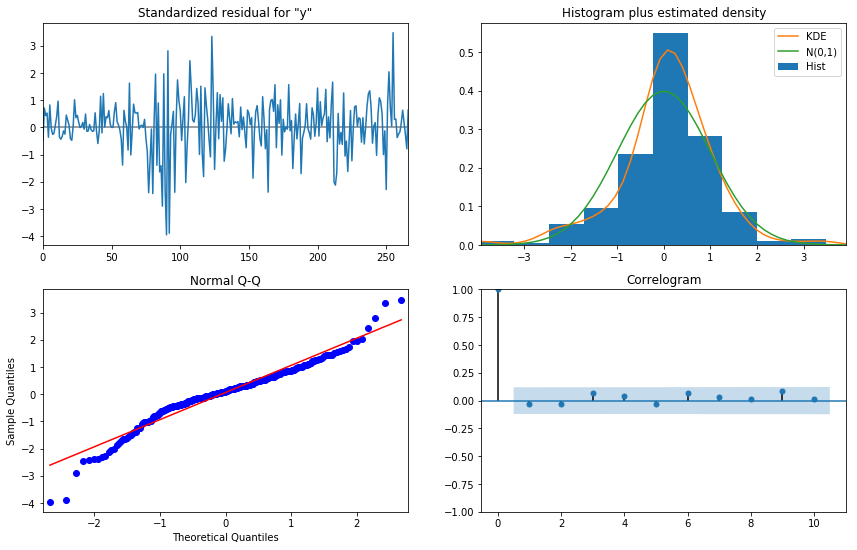

In [104]:
mod = sm.tsa.arima.ARIMA(endog=X_train.values, order=(2,0,2), trend='n', enforce_stationarity =False)
res = mod.fit(cov_type='robust')

print(res.summary())


with mpl.rc_context():
    mpl.rc("figure", figsize=(9*1.6,9))
    res.plot_diagnostics()

## Forecasting | Cross Validation Error | Performance Metrics 

1 period forecasting:

$$
\log \left(\dfrac{X_{t+1}}{X_{t}}\right) = \hat{r_{t+1}} \Rightarrow \hat{X_{t+1}} = X_{t}e^{\hat{r_{t+1}}}
$$



In [105]:
r_t_plus_1 = res.forecast()[0]; r_t_plus_1

0.0027546879740182155

In [106]:
t = X_test.index[0]; t

Timestamp('2020-11-20 00:00:00')

In [107]:
estim_X_t_plus_1 = google_close[t] * np.exp(r_t_plus_1);estim_X_t_plus_1

1741.1697841453838

In [108]:
true_X_t_plus_1 = google_close[t]; true_X_t_plus_1

1736.3800048828

**Rolling forward forecasting**

**Metrics**

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error